In [1]:
import numpy as np
import pandas as pd 
import scanpy as sc
import utils
import mrf
import os 
import random 
import imp
import mrf

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_2566/1071779760.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [86]:
imp.reload(mrf)

<module 'mrf' from '/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py'>

In [3]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))
import seaborn as sns

In [4]:
adata = sc.read_visium('../../dataset/goldStandard')
adata = utils.data_preprocess(adata)

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)

In [6]:
coord = np.array(adata.obs.iloc[:,1:3])

In [94]:
labels_mtx = mrf.mrf_process(adata, gene_id='CAMK2N1', beta = 10,max_iteration=1e5)

/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py:75: RuntimeWarning: overflow encountered in scalar divide
  if (-delta / current_tmp<-600):


385 pixels changed after 100000 iterations


In [51]:
labels_mtx.sum()

3301

In [81]:
exp = adata[:, 'CAMK2N1'].X

In [10]:
from sklearn import mixture 

In [82]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(exp)
cls_para = gmm.means_.reshape(-1), gmm.covariances_.reshape(-1)
cls_para

(array([ 0.25635338, -1.57769938]), array([0.39182654, 1.84739403]))

In [73]:
np.array(cls_para).T

array([[-1.57769938,  1.84739403],
       [ 0.25635338,  0.39182654]])

In [74]:
cls_para[0]

array([-1.57769938,  0.25635338])

In [83]:
label = gmm.predict(exp)
label.sum()

335

In [95]:
adata.obs['old_labels'], adata.obs['new_labels'] = label, labels_mtx

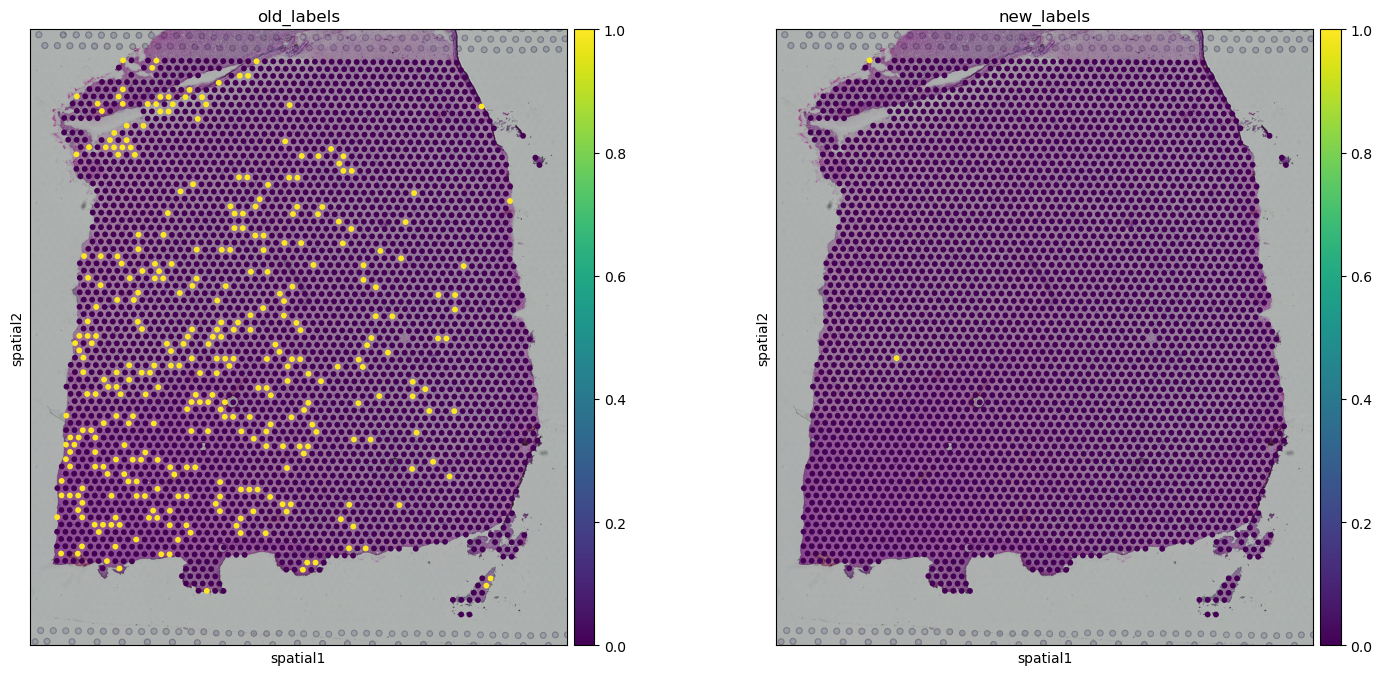

In [96]:
sc.pl.spatial(adata, color = ['old_labels', 'new_labels'])